# 3D visualisation of Mpro data

This notebook prototypes how we can create notebooks that allow to view the poses in their 3D context.

The idea is that we can use this when deciding this molecules to progress.

Currently it's just a selection of cells that explore how to use [NGL viewer](http://nglviewer.org/) in Jupyter. It is not yet at the stage to be useful.

If NGL is not displaying you might need to run this before running Jupyter:
```
jupyter-nbextension enable nglview --py --sys-prefix
```

In [1]:
import nglview as nv
import pandas as pd
import numpy as np

_ColormakerRegistry()

In [2]:
from ipywidgets import IntSlider, VBox

In [3]:
from IPython.display import SVG
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem import PandasTools

First show how we can display a PDB file.

Note that you can click on the expand icon in the top right corner to open the viewer in full screen.

In [4]:
view = nv.show_file('data/pdb/Mpro-x0072_0_bound.pdb')
view.clear_representations()
view.add_cartoon(selection="protein")
#view.add_surface(selection="protein", opacity=0.3)
#view.add_ball_and_stick(selection="ligand")
view.add_licorice(selection="ligand")
view

NGLWidget()

Need to work out:
- how to show/hide the ligand
- how to hide the waters and the irrelevant HETATMs
- how to resize the plot (make it square in size)

Now let's look at how to read the poses and display them.

In [5]:
# first read the SDF
df = PandasTools.LoadSDF('Mpro_16_data_dist.sdf', molColName='Molecule')
df.shape

(41582, 21)

,Target,TransFSScore,SCORE,SCORE.norm,Max_SuCOS_Score,Max_SuCOS_FeatureMap_Score,Max_SuCOS_Protrude_Score,Max_SuCOS_Index,Cum_SuCOS_Score,Cum_SuCOS_FeatureMap_Score,...,distance1,distance2,distance3,distance4,distance5,distance6,distance7,distance8,ID,Molecule
0,678.sdf.gz,0.162173,-14.4733,-1.31576,0.0,0.0,0.0,0,0.0,0.0,...,10.710180139007932,16.304745352503975,13.91176500484392,10.552996323793542,9.66521751177903,11.546378540910565,14.647385767091682,20.452533980169793,BrC(Br)=Cc1ccc(Br)cc1,
1,104.sdf.gz,0.078375,-30.9106,-3.09106,0.284089,0.024352,0.543826,13,2.078812,0.424377,...,8.567856481641133,14.763000142586195,1.4214143484571982,5.230037610763426,0.7826715530795768,1.8276005334864618,9.265571736811497,10.367241504373284,BrC(Br)=Cc1ccncn1,
2,104.sdf.gz,0.076633,-33.4132,-3.34132,0.31792,0.179804,0.456035,2,2.0723,0.394161,...,8.578404808004809,14.71861292207931,1.4933228251118362,5.131941421138788,0.7663575014312831,1.7553747349212934,9.22355074523906,10.3579120072532,BrC(Br)=Cc1cncnc1,
3,249.sdf.gz,0.178053,-15.4443,-0.90849,0.434434,0.151883,0.716986,13,3.900913,1.153626,...,6.085729245538286,9.413431813106206,1.253561701712364,1.9011986876704918,2.3459831712951376,2.110109148835672,3.7514797120602954,6.927404672747221,BrC(CCC1CCCCC1)Cc1ccccn1,
4,678.sdf.gz,0.431011,-23.7233,-1.39549,0.308991,0.09981,0.518171,8,3.210272,0.57876,...,4.619998675324484,7.01563288520715,7.200802048383221,0.7981530805553543,6.650019033055468,0.7308733063944811,1.498957297590562,6.085046479691015,BrC(CCC1CCCCC1)Cc1ccncc1,

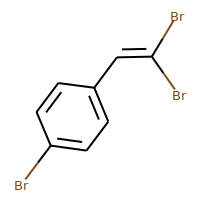
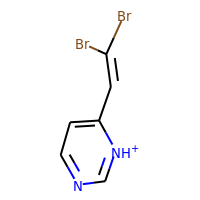
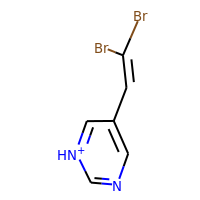
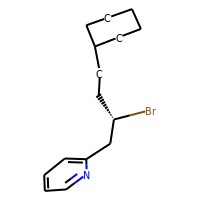
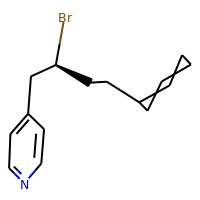

In [6]:
df.head()

In [7]:
# the Molecule column contains the rdkit.Chem.rdchem.Mol objects that we are needing.
# We grab the first 50

mols = df.head(50)['Molecule']
type(mols[0])

rdkit.Chem.rdchem.Mol

In [8]:
# this cell takes those first 50 molecules and dispalys them with NGL.
# The slider lets you step through them.

view = nv.NGLWidget()

for mol in mols:
    view.add_structure(nv.RdkitStructure(mol))
view.show_only([0])

slider = IntSlider(max=len(mols)-1)

def show_one_ligand(change):
    val = change['new']
    view.show_only([val])
    
slider.observe(show_one_ligand, 'value')

VBox([view, slider])

## TODO

- work out how to combine the poses and the protein
- better way to navigate through the poses
- a way to visualise the virtual screening scores (use a plot that allows to filter these and those selected get dispalyed in 3D?)
- allow user to choose which protein to view (each pose knows the protein it was docked into)
- also show the 2D (SMILES) alongside to make interpretation simpler
- lots more!

**If anyone has expertise in using NGL in Jupyter and want to help out there then please let us know!**
